In [7]:
import cv2
import cv2.dnn
import matplotlib.pyplot as plt

In [2]:
faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"

ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"

In [3]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

age_ranges = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']

## age detection

In [11]:
# Load the model and its corresponding prototxt file
faceNet=cv2.dnn.readNet(faceModel, faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
# Load the input image
image = cv2.imread("photo 2.png")

# Preprocess the image by subtracting the mean RGB values of the dataset
blob = cv2.dnn.blobFromImage(image, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)

# Set the input to the model and make a forward pass to obtain the predicted age
ageNet.setInput(blob)
age_preds = ageNet.forward()

# Find the index of the predicted age
age_index = age_preds[0].argmax()

# Get the predicted age range
predicted_age = age_ranges[age_index]
confidence = age_preds[0][age_index]

# Convert the image from BGR to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

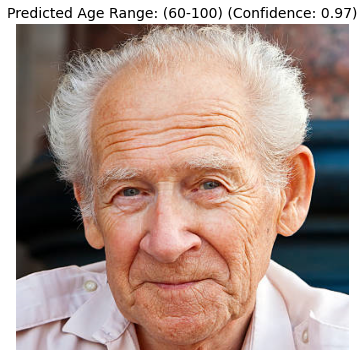

In [12]:
# Plot the image and overlay the predicted age
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title(f"Predicted Age Range: {predicted_age} (Confidence: {confidence:.2f})", fontsize=14)
plt.axis('off')
plt.show()

In [10]:
laoutputbel = "oui" if age_ranges[age_index] == "(25-32)" else "no"
print(laoutputbel) 

no
